<a href="https://colab.research.google.com/github/PhucThinh20146028/AI_exercise/blob/main/W11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

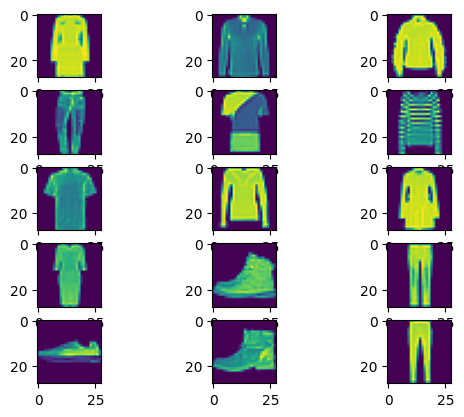

In [ ]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import pandas as pd

(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()
x_train.shape
x_test.shape
y_train.shape
y_test.shape

for i in range(15):
  plt.subplot(5,3,i+1)
  plt.imshow(x_train[500+i])
plt.show()

In [ ]:
x_train=x_train.reshape(60000,28,28,1)
x_train = x_train.astype('float32')/255
x_train.shape

(60000, 28, 28, 1)

In [ ]:
x_test = x_test.reshape((10000,28,28,1))
x_test = x_test.astype('float32')/255
x_test.shape

(10000, 28, 28, 1)

In [ ]:
from keras.utils import to_categorical

y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [ ]:
y_train.shape

(60000, 10)

In [ ]:
y_test.shape

(10000, 10)

In [ ]:
from keras.models import Sequential,Model
from keras.layers import Dense, Flatten,Conv2D,MaxPooling2D,Normalization,LeakyReLU
from keras.layers import Dropout,Activation
from keras.optimizers import Adam

model = Sequential()

model.add(Conv2D(32,kernel_size = (3,3),activation='linear',input_shape=(28,28,1),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(64,(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Flatten())
model.add(Dense(128,activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                    

In [ ]:
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
train=model.fit(x_train,y_train,batch_size=64,epochs=20,verbose=1)
test_Loss,test_Acc=model.evaluate(x_test,y_test)
print('Độ mất mát: ',test_Loss)
print('Độ chính xác: ', test_Acc)

Epoch 1/20
938/938 [==============================] - 86s 90ms/step - loss: 0.2290 - accuracy: 0.9160
Epoch 2/20
938/938 [==============================] - 83s 88ms/step - loss: 0.1980 - accuracy: 0.9269
Epoch 3/20
938/938 [==============================] - 84s 89ms/step - loss: 0.1750 - accuracy: 0.9363
Epoch 4/20
938/938 [==============================] - 92s 98ms/step - loss: 0.1559 - accuracy: 0.9423
Epoch 5/20
938/938 [==============================] - 82s 87ms/step - loss: 0.1381 - accuracy: 0.9501
Epoch 6/20
433/938 [============>.................] - ETA: 42s - loss: 0.1197 - accuracy: 0.9560

In [ ]:
model.save('model1.h5')

In [ ]:
accuracy = train.history['accuracy']
loss = train.history['loss']
plt.plot(20,accuracy,'bo',label='Training accuracy')
plt.plot(20,loss,'b',label='Training loss')
plt.legend()
plt.show